#### Forecasting Using FbProphet

In [ ]:
!pip install pystan
! conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [11735 lines of output]
  C:\Users\Shubham1999\AppData\Local\Temp\pip-install-isqcq4bk\pystan_6ea7ce4129ab44e68398554d29a61090\setup.py:235: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command import install
  Compiling pystan/_api.pyx because it depends on C:\ProgramData\Anaconda3\lib\site-packages\Cython\Includes\libcpp\vector.pxd.
  Compiling pystan/_chains.pyx because it depends on C:\ProgramData\Anaconda3\lib\site-packages\Cython\Includes\libcpp\vector.pxd.
  [1/2] Cythonizing py


     -------------------------------------- 91.8/91.8 kB 652.7 kB/s eta 0:00:00
     -------------------------------------- 323.6/323.6 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 156.2/156.2 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 16.2/16.2 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
  Running setup.py install for pystan: started
  Running setup.py install for pystan: finished with status 'error'


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df=pd.read_csv('airline_passengers.csv')

In [80]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [79]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


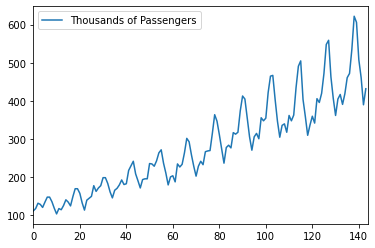

In [81]:
df.plot()

In [82]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [83]:
df.drop(144,axis=0,inplace=True)

In [84]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [88]:
df['ds'] = pd.to_datetime(df['ds'])

In [91]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [92]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [93]:
from fbprophet import Prophet

In [94]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [95]:
# Initialize the Model
model=Prophet()

In [96]:
df.columns

Index(['ds', 'y'], dtype='object')

In [58]:
df.dropna(axis=0,inplace=True)

In [97]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [98]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [103]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [104]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [105]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [106]:
prediction=model.predict(future_dates)

In [107]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,57.631562,111.708136,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,50.452764,105.815553,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,82.783039,139.039762,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,80.296089,136.975932,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,84.868864,140.400938,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


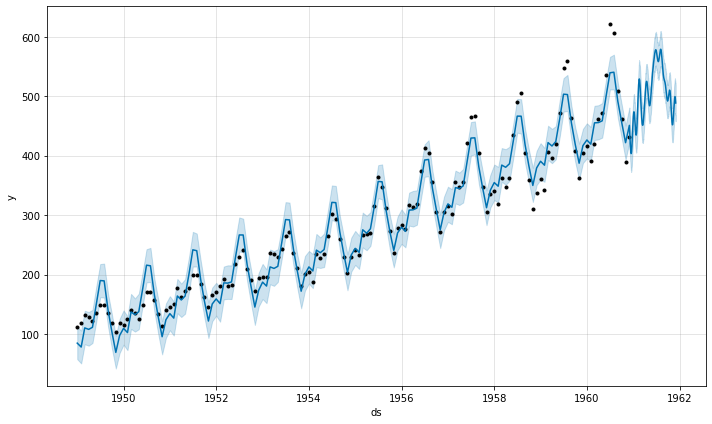

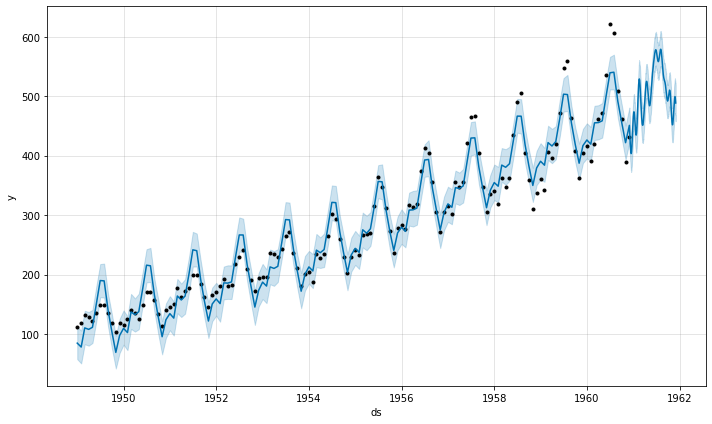

In [108]:
### plot the predicted projection
model.plot(prediction)

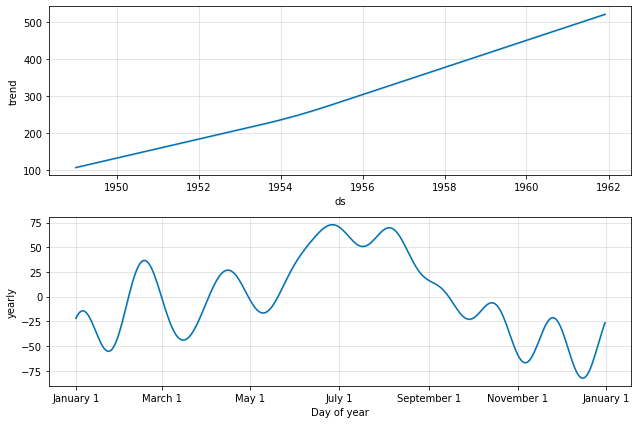

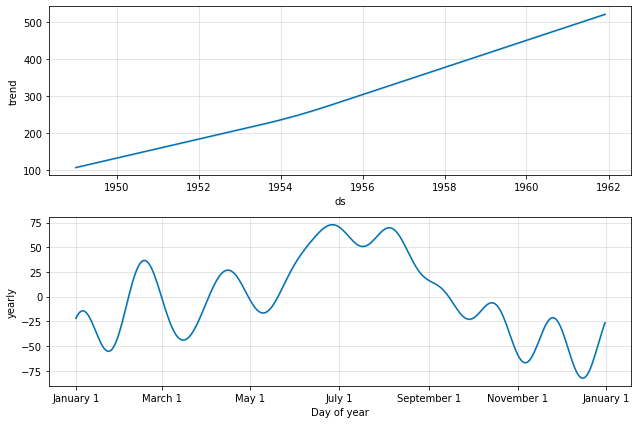

In [110]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation


In [112]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [111]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.146954,158.776362,150.0,1951-01-18
1,1951-03-01,171.498221,170.517796,172.569470,178.0,1951-01-18
2,1951-04-01,159.630469,157.376312,161.833576,163.0,1951-01-18
3,1951-05-01,144.280404,140.704754,147.758599,172.0,1951-01-18
4,1951-06-01,178.395560,173.347118,183.457045,178.0,1951-01-18


In [113]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


In [115]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


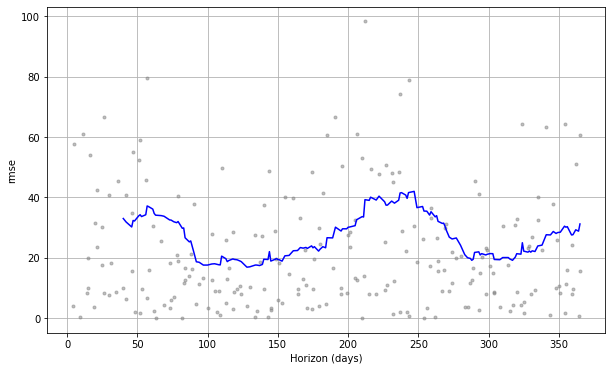

In [116]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')